In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl

# Just making the plots look better
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

In [15]:
import pandas as pd
df = pd.read_csv("VasaClean.csv")
df

,Unnamed: 0,Text,Title,Rating,DateOfExperience,DateOfReview,Username,UserLocation,UserContribution,UserLikes,normalized_tweet,grams
0,0,"If you are ever in Stockholm, these two museum...",Vasa museum and Nordic museum,50,March 2020,Mar 22,Travelin' Woman,NaN,5,NaN,"['ever', 'stockholm', 'two', 'museum', 'right'...","['ever stockholm', 'stockholm two', 'two museu..."
1,1,Really interesting and so well organised with ...,Well worth a visit.,50,March 2020,Mar 18,GoldfinchSuffolk,Suffolk,21,10,"['well', 'organised', 'enough', 'information',...","['well organised', 'organised enough', 'enough..."
2,2,We planned 2 hours for Vasa but it was so inte...,Awesome swedish history,50,February 2020,Mar 18,Teodora M,"Brasov, Romania",15,NaN,"['hour', 'vas', 'interesting', 'forgot', 'leav...","['hour vas', 'vas interesting', 'interesting f..."
3,3,It was a very nice experience being there.The ...,Vasa Museum-Something Special,40,March 2020,Mar 14,Patsa,NaN,7,NaN,"['nice', 'experience', 'huge', 'astonishing', ...","['nice experience', 'experience huge', 'huge a..."
4,4,Travelling with my 11 year old and wanted to d...,Very interesting,40,March 2020,Mar 14,Gavin F,"Aberdeen, United Kingdom",91,10,"['year', 'old', 'wanted', 'something', 'ticked...","['year old', 'old wanted', 'wanted something',..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2475,2475,This restored shipwreck is absolutely remarkab...,Should not be missed.,50,September 2018,Sep 2018,alan f,"Los Angeles, California",21,4,"['shipwreck', 'absolutely', 'remarkable', 'wor...","['shipwreck absolutely', 'absolutely remarkabl..."
2476,2476,This is dedicated to the Vasa only and is very...,history kept alive,40,August 2018,Sep 2018,STEVE,"Lugano, Switzerland",321,47,"['dedicated', 'vas', 'well', 'organized', 'wel...","['dedicated vas', 'vas well', 'well organized'..."
2477,2477,The has to be seen to be believed. It’s massiv...,Fantastic,50,September 2018,Sep 2018,Penny S,"Canberra, Australia",76,13,"['seen', 'believed', 'massive', 'detailed', 'w...","['seen believed', 'believed massive', 'massive..."
2478,2478,We were in as part of a Scandinavia tour and t...,Glad we didn't skip this!,50,August 2018,Sep 2018,misc22016,"Tigard, Oregon",12,1,"['part', 'scandinavia', 'tour', 'vas', 'made',...","['part scandinavia', 'scandinavia tour', 'tour..."


In [16]:
df_Location = df.groupby(["UserLocation"]).size().sort_values().reset_index(name='count')
df_Location

,UserLocation,count
0,AU,1
1,"Odivelas, Portugal",1
2,"Old Bar, Australia",1
3,"Old Bridge, New Jersey",1
4,"Olney, Maryland",1
...,...,...
1180,"Los Angeles, California",22
1181,"Melbourne, Australia",32
1182,"Sydney, Australia",37
1183,"London, United Kingdom",92


In [17]:

df_Location = df_Location.drop(df_Location[df_Location['count'] < 9].index)
df_Location['UserLocation']

1165                         Athens, Greece
1166                    Canberra, Australia
1167                    Seattle, Washington
1168    Washington DC, District of Columbia
1169                    Adelaide, Australia
1170                    Copenhagen, Denmark
1171                        Dublin, Ireland
1172                      Chicago, Illinois
1173                     Bucharest, Romania
1174                        Toronto, Canada
1175              San Francisco, California
1176                    Brisbane, Australia
1177                   Singapore, Singapore
1178                New York City, New York
1179                       Perth, Australia
1180                Los Angeles, California
1181                   Melbourne, Australia
1182                      Sydney, Australia
1183                 London, United Kingdom
1184                      Stockholm, Sweden
Name: UserLocation, dtype: object

In [18]:
df_DOF = df.groupby(["DateOfExperience"]).size().reset_index(name='count')
#df_DOF = df_DOF.replace('may-13', 'May 2013')
#df_DOF = df_DOF.replace('may-14', 'May 2014')
#df_DOF = df_DOF.replace('may-15', 'May 2015')
#df_DOF = df_DOF.replace('may-16', 'May 2016')
#df_DOF = df_DOF.replace('may-17', 'May 2017')
#df_DOF = df_DOF.replace('may-18', 'May 2018')
#df_DOF = df_DOF.replace('may-19', 'May 2019')

df_DOF

,DateOfExperience,count
0,April 2018,10
1,April 2019,99
2,August 2018,122
3,August 2019,220
4,December 2017,6
5,December 2018,84
6,December 2019,56
7,February 2018,9
8,February 2019,79
9,February 2020,47


Text(0.5, 1.0, 'top 15 Number of Reviewers over Cities in the City Hall')

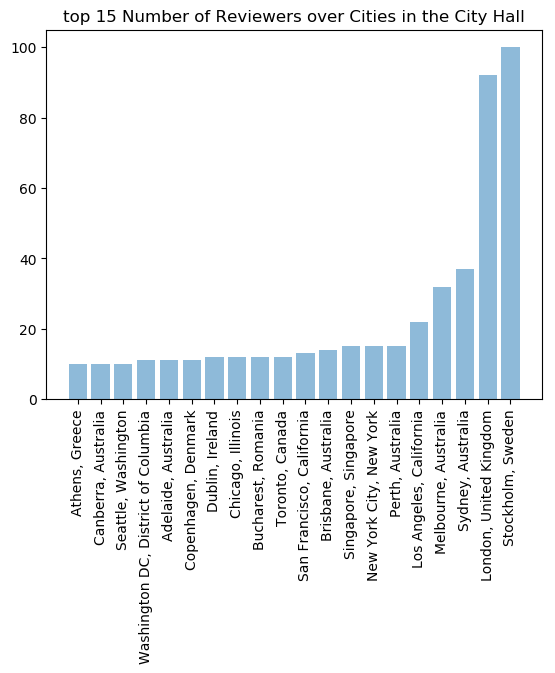

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(df_Location))


y = plt.bar(y_pos, df_Location['count'], align='center', alpha=0.5)
x = plt.xticks(y_pos, df_Location['UserLocation'],rotation=90)
plt.ylabel('')
plt.title('top 15 Number of Reviewers over Cities in the City Hall')


In [20]:
import pandas as pd
from datetime import datetime
import numpy as np

df_DOF['datetime'] = pd.to_datetime(df_DOF['DateOfExperience'])

In [21]:
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='5/1/2013', end='3/1/2020', freq='m')

In [22]:
df_DOF['DD'] = pd.Series(date_rng)

In [23]:
df_DOF2 = df_DOF.drop(['datetime','DateOfExperience'], axis = 1) 

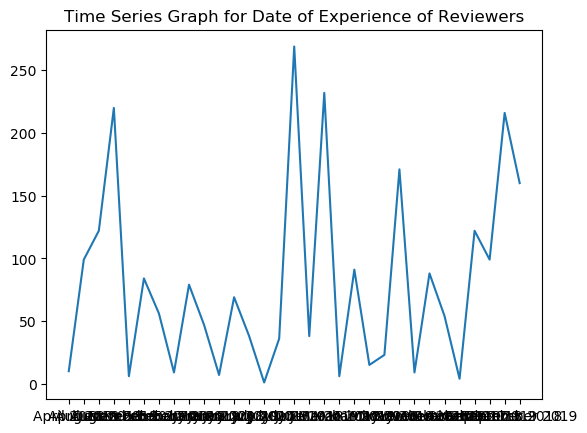

In [24]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

x = np.array([datetime.datetime(2013, 9, 28, i, 0) for i in range(24)])
y = np.random.randint(100, size=x.shape)

plt.plot(df_DOF['DateOfExperience'],df_DOF['count'])
plt.title('Time Series Graph for Date of Experience of Reviewers')
plt.show()


In [25]:
df_DOF

,DateOfExperience,count,datetime,DD
0,April 2018,10,2018-04-01,2013-05-31
1,April 2019,99,2019-04-01,2013-06-30
2,August 2018,122,2018-08-01,2013-07-31
3,August 2019,220,2019-08-01,2013-08-31
4,December 2017,6,2017-12-01,2013-09-30
5,December 2018,84,2018-12-01,2013-10-31
6,December 2019,56,2019-12-01,2013-11-30
7,February 2018,9,2018-02-01,2013-12-31
8,February 2019,79,2019-02-01,2014-01-31
9,February 2020,47,2020-02-01,2014-02-28


In [26]:
import pandas as pd
import numpy as np

reviews = df

reviews = reviews.assign(
    DateOfExperience = reviews.DateOfExperience.map(lambda v: v.split(" ")[0] if pd.notnull(v) else np.nan),
    UserLocation = reviews.UserLocation.map(lambda v: v.split(" ")[0] if pd.notnull(v) else np.nan),
    Username = reviews.Username.map(lambda v: v.split(" ")[0] if pd.notnull(v) else np.nan),
    UserContribution = reviews.UserContribution.map(lambda v: v.split(" ")[0] if pd.notnull(v) else np.nan),
    UserLikes = reviews.UserLikes.map(lambda v: v.split(" ")[0] if pd.notnull(v) else np.nan),
    DateOfReview = reviews.DateOfReview.map(lambda v: v.split(" ")[0] if pd.notnull(v) else np.nan)
)

reviews.head(50)


,Unnamed: 0,Text,Title,Rating,DateOfExperience,DateOfReview,Username,UserLocation,UserContribution,UserLikes,normalized_tweet,grams
0,0,"If you are ever in Stockholm, these two museum...",Vasa museum and Nordic museum,50,March,Mar,Travelin',NaN,5,NaN,"['ever', 'stockholm', 'two', 'museum', 'right'...","['ever stockholm', 'stockholm two', 'two museu..."
1,1,Really interesting and so well organised with ...,Well worth a visit.,50,March,Mar,GoldfinchSuffolk,Suffolk,21,10,"['well', 'organised', 'enough', 'information',...","['well organised', 'organised enough', 'enough..."
2,2,We planned 2 hours for Vasa but it was so inte...,Awesome swedish history,50,February,Mar,Teodora,"Brasov,",15,NaN,"['hour', 'vas', 'interesting', 'forgot', 'leav...","['hour vas', 'vas interesting', 'interesting f..."
3,3,It was a very nice experience being there.The ...,Vasa Museum-Something Special,40,March,Mar,Patsa,NaN,7,NaN,"['nice', 'experience', 'huge', 'astonishing', ...","['nice experience', 'experience huge', 'huge a..."
4,4,Travelling with my 11 year old and wanted to d...,Very interesting,40,March,Mar,Gavin,"Aberdeen,",91,10,"['year', 'old', 'wanted', 'something', 'ticked...","['year old', 'old wanted', 'wanted something',..."
5,5,"One of the top of the world! In my opinion, on...",One of the top museums of the world,50,February,Mar,PCouto,NaN,17,1,"['top', 'world', 'opinion', 'one', 'top', 'wor...","['top world', 'world opinion', 'opinion one', ..."
6,6,"Interesting place to visit, is impressive, nic...",Impressive ship,40,December,Mar,Simon,"Salisbury,",402,155,"['visit', 'impressive', 'nice', 'cafe', 'well'...","['visit impressive', 'impressive nice', 'nice ..."
7,7,The itself was very cool but can you build an ...,Unique Museum,50,March,Mar,skymom,"Petoskey,",50,6,"['cool', 'build', 'entire', 'around', 'one', '...","['cool build', 'build entire', 'entire around'..."
8,8,What has been done with the restoration and ex...,Very well done.,50,March,Mar,GregandWinnie,"Sydney,",182,70,"['done', 'restoration', 'exhibition', 'truly',...","['done restoration', 'restoration exhibition',..."
9,9,It was truly amazing to see this so well prese...,Very interesting!,50,April,Mar,Kipuka,"Oslo,",85,25,"['truly', 'amazing', 'see', 'well', 'preserved...","['truly amazing', 'amazing see', 'see well', '..."


Text(0.5, 1.0, 'Number of visist per month to the Vasa museum(2013-2020)')

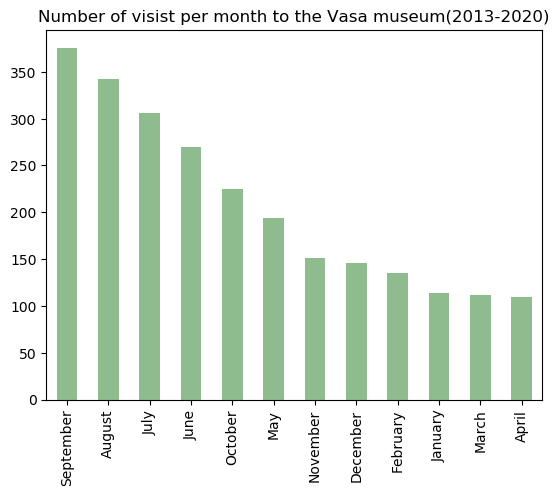

In [28]:
(reviews
     .DateOfExperience
     .value_counts()
        ).plot.bar(y_pos, color='darkseagreen').set_title("Number of visist per month to the Vasa museum(2013-2020)")

Text(0.5, 1.0, 'Number of Reviews per month to Vasa Museum (2013-2020)')

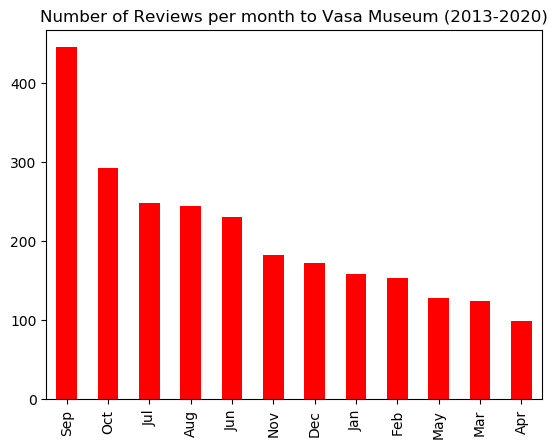

In [32]:
(reviews
     .DateOfReview
     .value_counts()
        ).plot.bar(y_pos, color='red').set_title("Number of Reviews per month to Vasa Museum (2013-2020)")

Text(0.5, 1.0, 'Number of reviews per Rating category of Vasa Museum (2013-2020)')

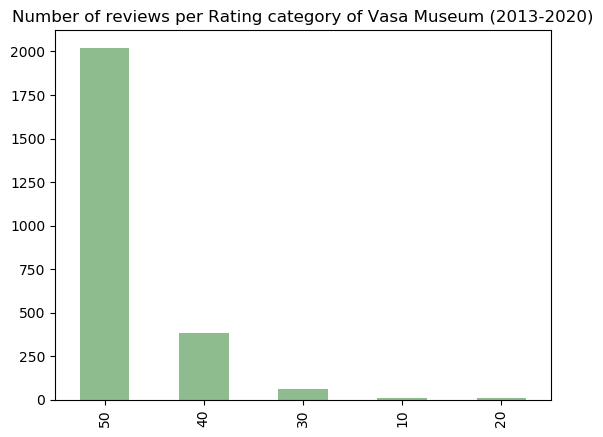

In [31]:
(reviews
     .Rating
     .value_counts()
     
        ).plot.bar(y_pos, color='darkseagreen').set_title("Number of reviews per Rating category of Vasa Museum (2013-2020)")